In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
#Libraries setup
os.chdir('/dados/home-credit')
print(os.getcwd())
pd.set_option('display.max_columns', 200)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

/dados/home-credit


In [4]:
#Importing datasets
train = pd.read_csv('application_train.csv')
#test = pd.read_csv('application_test.csv')
#b1 = pd.read_csv('bureau.csv')
#bb2 = pd.read_csv('bureau_balance.csv')
pa1 = pd.read_csv('previous_application.csv')
#pos2 = pd.read_csv('POS_CASH_balance.csv')
#ip2 = pd.read_csv('installments_payments.csv')
#cb2 = pd.read_csv('credit_card_balance.csv')
description = pd.read_csv("/home/shink/gdata/hcg_gabi_shin/HomeCredit_columns_description.csv", encoding = "ISO-8859-1")
#sample = pd.read_csv('sample_submission.csv')c

In [5]:
#setting_datasets
pa1.columns = map(str.lower, pa1.columns)
#pos2.columns = map(str.lower, pos2.columns)
#ip2.columns = map(str.lower, ip2.columns)
#cb2.columns = map(str.lower, cb2.columns)
train.columns = map(str.lower, train.columns)
description.columns = map(str.lower, description.columns)

In [6]:
pa1_tr = pd.merge(train, pa1, on=['sk_id_curr'])

In [7]:
pa1_tr.head()

sk_id_curr  target name_contract_type_x code_gender flag_own_car  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  flag_own_realty  cnt_children  amt_income_total  amt_credit_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   amt_annuity_x  amt_goods_price_x name_type_suite_x name_income_type  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   
3        35698.5          1129500.0            Family    State servant   
4         6750.0           135000.0     Unaccompanied          Working   

             name_education_type    name_family_status  name_housing_type  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   region_population_relative  days_birth  days_employed  days_registration  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.003541      -16765          -1188            -1186.0   
3                    0.003541      -16765          -1188            -1186.0   
4                    0.010032      -19046           -225            -4260.0   

   days_id_publish  own_car_age  flag_mobil  flag_emp_phone  flag_work_phone  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2             -291          NaN           1               1                0   
3             -291          NaN           1               1                0   
4            -2531         26.0           1               1                1   

   flag_cont_mobile  flag_phone  flag_email occupation_type  cnt_fam_members  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   region_rating_client  region_rating_client_w_city  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  weekday_appr_process_start_x  hour_appr_process_start_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   reg_region_not_live_region  reg_region_not_work_region  \
0                           0                           0   
1 

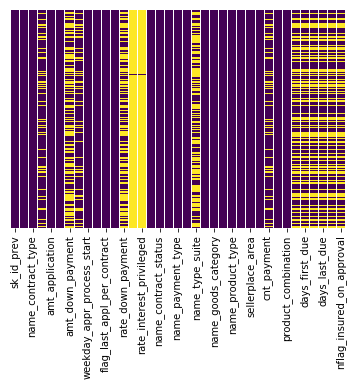

In [8]:
sns.heatmap(pa1.isnull(), yticklabels = False, cbar = False, cmap='viridis')

In [19]:
#name_contract_type_y - tipo de credito, se foi em dinheiro, bens ou rotativo
print(description.description[175])
print(pa1_tr.name_contract_type_y.isnull().sum())
pa1_tr.groupby('name_contract_type_y').target.describe()

Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application
0


count      mean       std  min  25%  50%  75%  max
name_contract_type_y                                                       
Cash loans            626764.0  0.091258  0.287975  0.0  0.0  0.0  0.0  1.0
Consumer loans        625256.0  0.077100  0.266750  0.0  0.0  0.0  0.0  1.0
Revolving loans       161368.0  0.104686  0.306150  0.0  0.0  0.0  0.0  1.0
XNA                      313.0  0.201278  0.401597  0.0  0.0  0.0  0.0  1.0

Annuity of previous application
307218


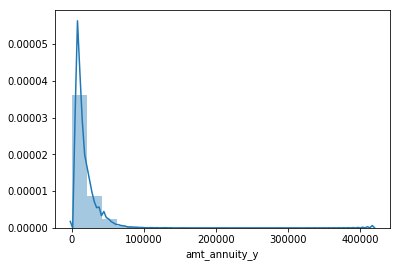

In [21]:
#amt_annuity_y - anuidade da aplicacao anterior
print(description.description[176])
print(pa1_tr.amt_annuity_y.isnull().sum())
sns.distplot(pa1_tr.amt_annuity_y.dropna(), kde=True, bins=20)

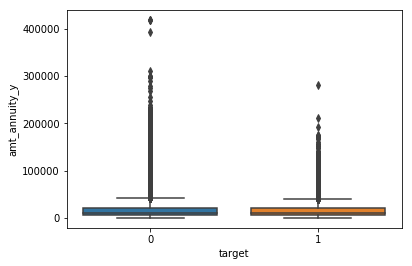

In [22]:
sns.boxplot(x='target', y='amt_annuity_y', data=pa1_tr)

For how much credit did client ask on the previous application
0


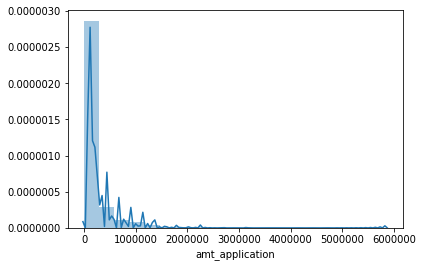

In [23]:
#amt_application - quanto credito o cliente pediu na aplicacao anterior
print(description.description[177])
print(pa1_tr.amt_application.isnull().sum())
sns.distplot(pa1_tr.amt_application, kde=True, bins=20)

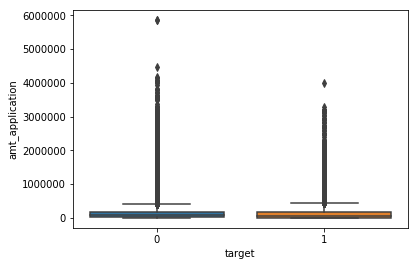

In [25]:
sns.boxplot(x='target', y='amt_application', data=pa1_tr)

Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT
1


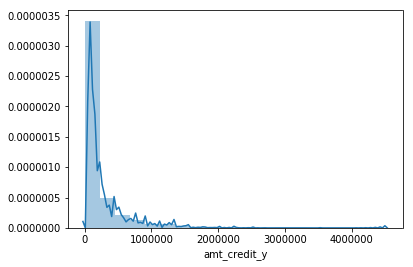

In [26]:
#amt_credit_y - quanto credito o cliente de fato recebeu
print(description.description[178])
print(pa1_tr.amt_credit_y.isnull().sum())
sns.distplot(pa1_tr.amt_credit_y.dropna(), kde=True, bins=20)

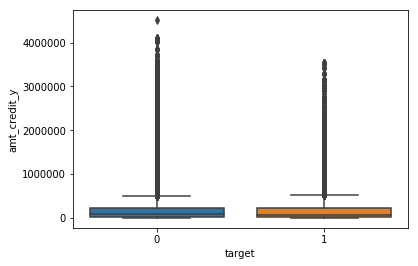

In [27]:
sns.boxplot(x='target', y='amt_credit_y', data=pa1_tr)

Down payment on the previous application
749540


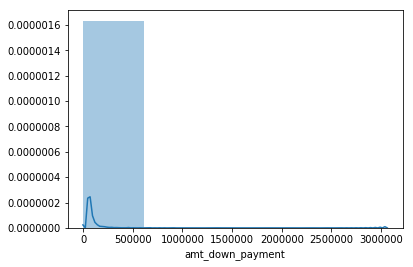

In [28]:
#amt_down_payment - pagamento inicial
print(description.description[179])
print(pa1_tr.amt_down_payment.isnull().sum())
sns.distplot(pa1_tr.amt_down_payment.dropna(), kde=True, bins=5)

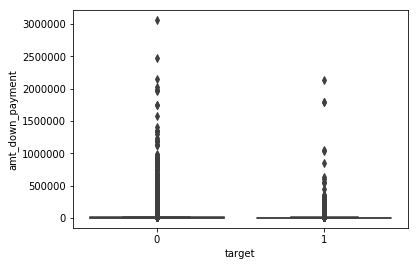

In [30]:
sns.boxplot(x='target', y='amt_down_payment', data=pa1_tr)

Goods price of good that client asked for (if applicable) on the previous application
319525


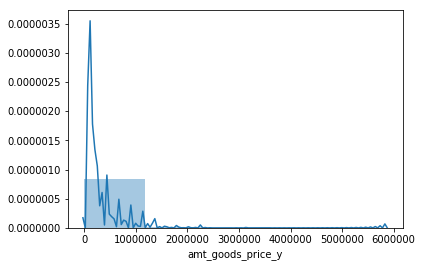

In [31]:
#amt_goods_price_y - preco dos bens
print(description.description[180])
print(pa1_tr.amt_goods_price_y.isnull().sum())
sns.distplot(pa1_tr.amt_goods_price_y.dropna(), kde=True, bins=5)

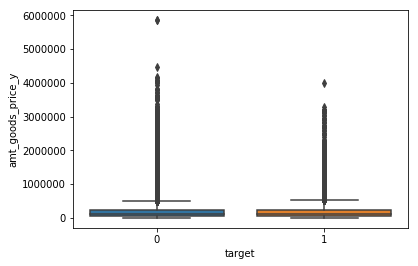

In [32]:
sns.boxplot(x='target', y='amt_goods_price_y', data=pa1_tr)

In [35]:
#weekday_appr_process_start_y - dia da semana em que o processo se iniciou
print(description.description[181])
print(pa1_tr.weekday_appr_process_start_y.isnull().sum())
pa1_tr.groupby('weekday_appr_process_start_y').target.describe()

On which day of the week did the client apply for previous application
0


count      mean       std  min  25%  50%  \
weekday_appr_process_start_y                                                
FRIDAY                        213373.0  0.087504  0.282573  0.0  0.0  0.0   
MONDAY                        214509.0  0.088607  0.284176  0.0  0.0  0.0   
SATURDAY                      204159.0  0.083469  0.276591  0.0  0.0  0.0   
SUNDAY                        140078.0  0.080548  0.272141  0.0  0.0  0.0   
THURSDAY                      211005.0  0.088898  0.284598  0.0  0.0  0.0   
TUESDAY                       215058.0  0.087674  0.282821  0.0  0.0  0.0   
WEDNESDAY                     215519.0  0.086976  0.281801  0.0  0.0  0.0   

                              75%  max  
weekday_appr_process_start_y            
FRIDAY                        0.0  1.0  
MONDAY                        0.0  1.0  
SATURDAY                      0.0  1.0  
SUNDAY                        0.0  1.0  
THURSDAY                      0.0  1.0  
TUESDAY                       0.0  1.0  
WEDNESDAY                     0.0  1.0

In [37]:
#hour_appr_process_start_y
print(description.description[182])
print(pa1_tr.hour_appr_process_start_y.isnull().sum())
pa1_tr.groupby('hour_appr_process_start_y').target.describe()

Approximately at what day hour did the client apply for the previous application
0


count      mean       std  min  25%  50%  75%  \
hour_appr_process_start_y                                                     
0                              92.0  0.152174  0.361158  0.0  0.0  0.0  0.0   
1                             180.0  0.077778  0.268569  0.0  0.0  0.0  0.0   
2                             950.0  0.092632  0.290068  0.0  0.0  0.0  0.0   
3                            4182.0  0.095887  0.294472  0.0  0.0  0.0  0.0   
4                            7861.0  0.098970  0.298640  0.0  0.0  0.0  0.0   
5                           12996.0  0.112573  0.316082  0.0  0.0  0.0  0.0   
6                           21705.0  0.113522  0.317237  0.0  0.0  0.0  0.0   
7                           38846.0  0.110385  0.313373  0.0  0.0  0.0  0.0   
8                           62317.0  0.104305  0.305659  0.0  0.0  0.0  0.0   
9                          107696.0  0.093123  0.290606  0.0  0.0  0.0  0.0   
10                         153800.0  0.087282  0.282249  0.0  0.0  0.0  0.0   
11                         163264.0  0.086816  0.281567  0.0  0.0  0.0  0.0   
12                         157528.0  0.084652  0.278363  0.0  0.0  0.0  0.0   
13                         145838.0  0.086582  0.281223  0.0  0.0  0.0  0.0   
14                         133621.0  0.084470  0.278093  0.0  0.0  0.0  0.0   
15                         120895.0  0.083262  0.276279  0.0  0.0  0.0  0.0   
16                         102526.0  0.078634  0.269168  0.0  0.0  0.0  0.0   
17                          80267.0  0.076383  0.265611  0.0  0.0  0.0  0.0   
18                          53948.0  0.074238  0.262160  0.0  0.0  0.0  0.0   
19                          28726.0  0.070668  0.256273  0.0  0.0  0.0  0.0   
20                          12260.0  0.069494  0.254303  0.0  0.0  0.0  0.0   
21                           3422.0  0.078901  0.269624  0.0  0.0  0.0  0.0   
22                            618.0  0.067961  0.251883  0.0  0.0  0.0  0.0   
23                            163.0  0.098160  0.298447  0.0  0.0  0.0  0.0   

                           max  
hour_appr_process_start_y       
0                          1.0  
1                          1.0  
2                          1.0  
3                          1.0  
4                          1.0  
5                          1.0  
6                          1.0  
7                          1.0  
8                          1.0  
9                          1.0  
10                         1.0  
11                         1.0  
12                         1.0  
13                         1.0  
14                         1.0  
15                         1.0  
16                         1.0  
17                         1.0  
18                         1.0  
19                         1.0  
20                         1.0  
21                         1.0  
22                         1.0  
23                         1.0

In [38]:
#flag_last_appl_per_contract - verifica se foi a ultima aplicacao (confere se nao ha duplicatas)
print(description.description[183])
print(pa1_tr.flag_last_appl_per_contract.isnull().sum())
pa1_tr.groupby('flag_last_appl_per_contract').target.describe()
#dropar todos que for N pois e duplicatas

Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract
0


count      mean       std  min  25%  50%  \
flag_last_appl_per_contract                                                 
N                               7314.0  0.108149  0.310589  0.0  0.0  0.0   
Y                            1406387.0  0.086441  0.281014  0.0  0.0  0.0   

                             75%  max  
flag_last_appl_per_contract            
N                            0.0  1.0  
Y                            0.0  1.0

In [39]:
#nflag_last_appl_in_day - verifica se e a ultima aplicacao do dia
print(description.description[184])
print(pa1_tr.nflag_last_appl_in_day.isnull().sum())
pa1_tr.groupby('nflag_last_appl_in_day').target.describe()
#dropar todos que for 0 pois e duplicatas

Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice
0


count      mean       std  min  25%  50%  75%  max
nflag_last_appl_in_day                                                        
0                          5044.0  0.100119  0.300188  0.0  0.0  0.0  0.0  1.0
1                       1408657.0  0.086504  0.281108  0.0  0.0  0.0  0.0  1.0

Down payment rate normalized on previous credit
749540


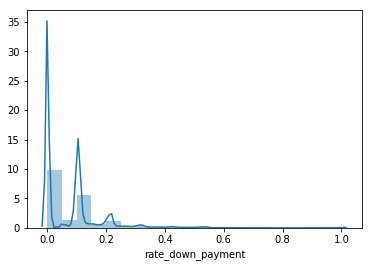

In [40]:
#rate_down_payment -de 0 a 1, taxa de pagamento inicial normalizado
print(description.description[186])
print(pa1_tr.rate_down_payment.isnull().sum())
sns.distplot(pa1_tr.rate_down_payment.dropna(), kde=True, bins=20)

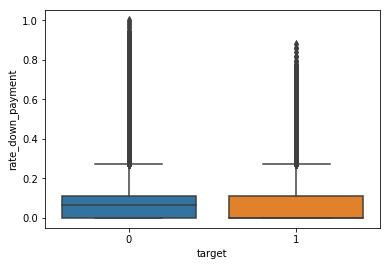

In [41]:
sns.boxplot(x='target', y='rate_down_payment', data=pa1_tr)

Interest rate normalized on previous credit
1408910


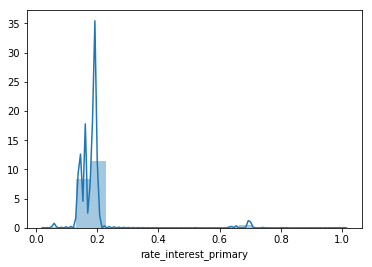

In [42]:
#rate_interest_primary - taxa de juros normalizado
print(description.description[187])
print(pa1_tr.rate_interest_primary.isnull().sum())
sns.distplot(pa1_tr.rate_interest_primary.dropna(), kde=True, bins=20)

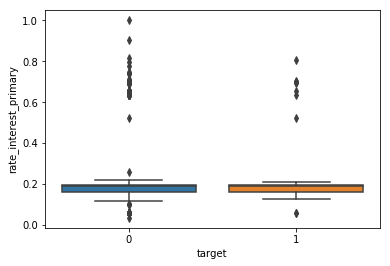

In [43]:
sns.boxplot(x='target', y='rate_interest_primary', data=pa1_tr)

Interest rate normalized on previous credit
1408910


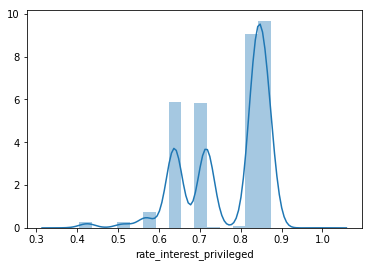

In [44]:
#rate_interest_privileged
print(description.description[188])
print(pa1_tr.rate_interest_privileged.isnull().sum())
sns.distplot(pa1_tr.rate_interest_privileged.dropna(), kde=True, bins=20)

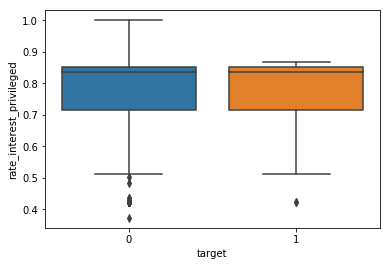

In [45]:
sns.boxplot(x='target', y='rate_interest_privileged', data=pa1_tr)

In [46]:
#name_cash_loan_purpose
print(description.description[189])
print(pa1_tr.name_cash_loan_purpose.isnull().sum())
pa1_tr.groupby('name_cash_loan_purpose').target.describe()

Purpose of the cash loan
0


count      mean       std  min  25%  50%  \
name_cash_loan_purpose                                                          
Building a house or an annex        2344.0  0.138225  0.345210  0.0  0.0  0.0   
Business development                 359.0  0.128134  0.334705  0.0  0.0  0.0   
Buying a garage                      116.0  0.060345  0.239158  0.0  0.0  0.0   
Buying a holiday home / land         463.0  0.118790  0.323892  0.0  0.0  0.0   
Buying a home                        701.0  0.119829  0.324993  0.0  0.0  0.0   
Buying a new car                     886.0  0.090293  0.286764  0.0  0.0  0.0   
Buying a used car                   2469.0  0.128797  0.335043  0.0  0.0  0.0   
Car repairs                          691.0  0.183792  0.387595  0.0  0.0  0.0   
Education                           1334.0  0.104948  0.306601  0.0  0.0  0.0   
Everyday expenses                   2052.0  0.105263  0.306967  0.0  0.0  0.0   
Furniture                            660.0  0.128788  0.335219  0.0  0.0  0.0   
Gasification / water supply          251.0  0.179283  0.384355  0.0  0.0  0.0   
Hobby                                 45.0  0.200000  0.404520  0.0  0.0  0.0   
Journey                             1042.0  0.106526  0.308658  0.0  0.0  0.0   
Medicine                            1871.0  0.134153  0.340908  0.0  0.0  0.0   
Money for a third person              23.0  0.173913  0.387553  0.0  0.0  0.0   
Other                              13432.0  0.124553  0.330224  0.0  0.0  0.0   
Payments on other loans             1573.0  0.160203  0.366911  0.0  0.0  0.0   
Purchase of electronic equipment     934.0  0.125268  0.331200  0.0  0.0  0.0   
Refusal to name the goal              13.0  0.230769  0.438529  0.0  0.0  0.0   
Repairs                            20117.0  0.130039  0.336355  0.0  0.0  0.0   
Urgent needs                        7236.0  0.149530  0.356635  0.0  0.0  0.0   
Wedding / gift / holiday             801.0  0.117353  0.322042  0.0  0.0  0.0   
XAP                               786937.0  0.082806  0.275589  0.0  0.0  0.0   
XNA                               567351.0  0.087174  0.282089  0.0  0.0  0.0   

                                  75%  max  
name_cash_loan_purpose                      
Building a house or an annex      0.0  1.0  
Business development              0.0  1.0  
Buying a garage                   0.0  1.0  
Buying a holiday home / land      0.0  1.0  
Buying a home                     0.0  1.0  
Buying a new car                  0.0  1.0  
Buying a used car                 0.0  1.0  
Car repairs                       0.0  1.0  
Education                         0.0  1.0  
Everyday expenses                 0.0  1.0  
Furniture                         0.0  1.0  
Gasification / water supply       0.0  1.0  
Hobby                             0.0  1.0  
Journey                           0.0  1.0  
Medicine                          0.0  1.0  
Money for a third person          0.0  1.0  
Other                             0.0  1.0  
Payments on other loans           0.0  1.0  
Purchase of electronic equipment  0.0  1.0  
Refusal to name the goal          0.0  1.0  
Repairs                           0.0  1.0  
Urgent needs                      0.0  1.0  
Wedding / gift / holiday          0.0  1.0  
XAP                               0.0  1.0  
XNA                               0.0  1.0

In [47]:
#name_contract_status - se foi aprovado, cancelado, recusado ou nao usado
print(description.description[190])
print(pa1_tr.name_contract_status.isnull().sum())
pa1_tr.groupby('name_contract_status').target.describe()

Contract status (approved, cancelled, ...) of previous application
0


count      mean       std  min  25%  50%  75%  max
name_contract_status                                                       
Approved              886099.0  0.075887  0.264817  0.0  0.0  0.0  0.0  1.0
Canceled              259441.0  0.091736  0.288653  0.0  0.0  0.0  0.0  1.0
Refused               245390.0  0.119964  0.324920  0.0  0.0  0.0  0.0  1.0
Unused offer           22771.0  0.082517  0.275157  0.0  0.0  0.0  0.0  1.0

Relative to current application when was the decision about previous application made
0


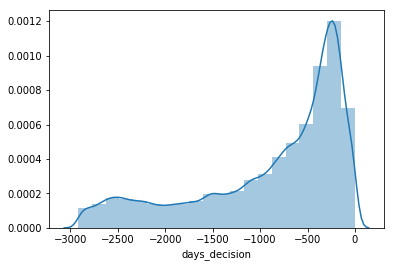

In [48]:
#days_decision
print(description.description[191])
print(pa1_tr.days_decision.isnull().sum())
sns.distplot(pa1_tr.days_decision.dropna(), kde=True, bins=20)

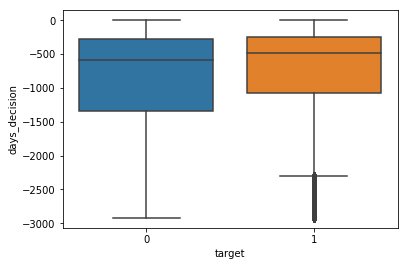

In [49]:
sns.boxplot(x='target', y='days_decision', data=pa1_tr)

In [50]:
#name_payment_type - metodo de pagamento que o cliente escolheu para pagar a divida
print(description.description[192])
print(pa1_tr.name_payment_type.isnull().sum())
pa1_tr.groupby('name_payment_type').target.describe()

Payment method that client chose to pay for the previous application
0


count      mean       std  min  \
name_payment_type                                                              
Cash through the bank                      882700.0  0.080866  0.272629  0.0   
Cashless from the account of the employer     941.0  0.080765  0.272619  0.0   
Non-cash from your account                   7100.0  0.082113  0.274556  0.0   
XNA                                        522960.0  0.096223  0.294898  0.0   

                                           25%  50%  75%  max  
name_payment_type                                              
Cash through the bank                      0.0  0.0  0.0  1.0  
Cashless from the account of the employer  0.0  0.0  0.0  1.0  
Non-cash from your account                 0.0  0.0  0.0  1.0  
XNA                                        0.0  0.0  0.0  1.0

In [52]:
#code_reject_reason
print(description.description[193])
print(pa1_tr.code_reject_reason.isnull().sum())
pa1_tr.groupby('code_reject_reason').target.describe()

Why was the previous application rejected
0


count      mean       std  min  25%  50%  75%  max
code_reject_reason                                                        
CLIENT                22771.0  0.082517  0.275157  0.0  0.0  0.0  0.0  1.0
HC                   145984.0  0.117342  0.321828  0.0  0.0  0.0  0.0  1.0
LIMIT                 47773.0  0.125594  0.331395  0.0  0.0  0.0  0.0  1.0
SCO                   32636.0  0.099982  0.299980  0.0  0.0  0.0  0.0  1.0
SCOFR                 10875.0  0.209287  0.406819  0.0  0.0  0.0  0.0  1.0
SYSTEM                  672.0  0.062500  0.242242  0.0  0.0  0.0  0.0  1.0
VERIF                  3079.0  0.092563  0.289865  0.0  0.0  0.0  0.0  1.0
XAP                 1145533.0  0.079477  0.270481  0.0  0.0  0.0  0.0  1.0
XNA                    4378.0  0.100959  0.301309  0.0  0.0  0.0  0.0  1.0

In [55]:
#name_type_suite_y - quem estava acompanhando
print(description.description[194])
print(pa1_tr.name_type_suite_y.isnull().sum())
pa1_tr.groupby('name_type_suite_y').target.describe()

Who accompanied client when applying for the previous application
694672


count      mean       std  min  25%  50%  75%  max
name_type_suite_y                                                       
Children            27106.0  0.063565  0.243981  0.0  0.0  0.0  0.0  1.0
Family             181880.0  0.074742  0.262975  0.0  0.0  0.0  0.0  1.0
Group of people      1929.0  0.088647  0.284307  0.0  0.0  0.0  0.0  1.0
Other_A              7820.0  0.087084  0.281977  0.0  0.0  0.0  0.0  1.0
Other_B             15073.0  0.084920  0.278772  0.0  0.0  0.0  0.0  1.0
Spouse, partner     57586.0  0.082242  0.274736  0.0  0.0  0.0  0.0  1.0
Unaccompanied      427635.0  0.082844  0.275647  0.0  0.0  0.0  0.0  1.0

In [56]:
#name_client_type
print(description.description[195])
print(pa1_tr.name_client_type.isnull().sum())
pa1_tr.groupby('name_client_type').target.describe()

Was the client old or new client when applying for the previous application
0


count      mean       std  min  25%  50%  75%  max
name_client_type                                                        
New                259540.0  0.089948  0.286107  0.0  0.0  0.0  0.0  1.0
Refreshed          114936.0  0.073363  0.260732  0.0  0.0  0.0  0.0  1.0
Repeater          1037682.0  0.087146  0.282049  0.0  0.0  0.0  0.0  1.0
XNA                  1543.0  0.099157  0.298970  0.0  0.0  0.0  0.0  1.0

In [57]:
#name_goods_category
print(description.description[196])
print(pa1_tr.name_goods_category.isnull().sum())
pa1_tr.groupby('name_goods_category').target.describe()

What kind of goods did the client apply for in the previous application
0


count      mean       std  min  25%  50%  75%  \
name_goods_category                                                          
Additional Service           109.0  0.064220  0.246277  0.0  0.0  0.0  0.0   
Animals                        1.0  0.000000       NaN  0.0  0.0  0.0  0.0   
Audio/Video                85502.0  0.076618  0.265986  0.0  0.0  0.0  0.0   
Auto Accessories            6228.0  0.090719  0.287233  0.0  0.0  0.0  0.0   
Clothing and Accessories   19590.0  0.057019  0.231885  0.0  0.0  0.0  0.0   
Computers                  89923.0  0.081047  0.272909  0.0  0.0  0.0  0.0   
Construction Materials     21356.0  0.069676  0.254606  0.0  0.0  0.0  0.0   
Consumer Electronics      104785.0  0.070669  0.256272  0.0  0.0  0.0  0.0   
Direct Sales                 330.0  0.081818  0.274504  0.0  0.0  0.0  0.0   
Education                     89.0  0.056180  0.231573  0.0  0.0  0.0  0.0   
Fitness                      166.0  0.042169  0.201582  0.0  0.0  0.0  0.0   
Furniture                  45439.0  0.058496  0.234682  0.0  0.0  0.0  0.0   
Gardening                   2322.0  0.067183  0.250393  0.0  0.0  0.0  0.0   
Homewares                   4309.0  0.066373  0.248961  0.0  0.0  0.0  0.0   
Insurance                     58.0  0.103448  0.307203  0.0  0.0  0.0  0.0   
Jewelry                     5188.0  0.090401  0.286783  0.0  0.0  0.0  0.0   
Medical Supplies            3240.0  0.056173  0.230291  0.0  0.0  0.0  0.0   
Medicine                    1302.0  0.061444  0.240235  0.0  0.0  0.0  0.0   
Mobile                    193743.0  0.086470  0.281058  0.0  0.0  0.0  0.0   
Office Appliances           1985.0  0.082620  0.275376  0.0  0.0  0.0  0.0   
Other                       2337.0  0.057338  0.232538  0.0  0.0  0.0  0.0   
Photo / Cinema Equipment   21707.0  0.076289  0.265466  0.0  0.0  0.0  0.0   
Sport and Leisure           2540.0  0.072441  0.259268  0.0  0.0  0.0  0.0   
Tourism                     1324.0  0.042296  0.201340  0.0  0.0  0.0  0.0   
Vehicles                    2854.0  0.100561  0.300799  0.0  0.0  0.0  0.0   
Weapon                        65.0  0.076923  0.268543  0.0  0.0  0.0  0.0   
XNA                       797209.0  0.093857  0.291630  0.0  0.0  0.0  0.0   

                          max  
name_goods_category            
Additional Service        1.0  
Animals                   0.0  
Audio/Video               1.0  
Auto Accessories          1.0  
Clothing and Accessories  1.0  
Computers                 1.0  
Construction Materials    1.0  
Consumer Electronics      1.0  
Direct Sales              1.0  
Education                 1.0  
Fitness                   1.0  
Furniture                 1.0  
Gardening                 1.0  
Homewares                 1.0  
Insurance                 1.0  
Jewelry                   1.0  
Medical Supplies          1.0  
Medicine                  1.0  
Mobile                    1.0  
Office Appliances         1.0  
Other                     1.0  
Photo / Cinema Equipment  1.0  
Sport and Leisure         1.0  
Tourism                   1.0  
Vehicles                  1.0  
Weapon                    1.0  
XNA                       1.0

In [58]:
#name_portfolio
print(description.description[197])
print(pa1_tr.name_portfolio.isnull().sum())
pa1_tr.groupby('name_portfolio').target.describe()

Was the previous application for CASH, POS, CAR, 
0


count      mean       std  min  25%  50%  75%  max
name_portfolio                                                       
Cards           121985.0  0.101619  0.302148  0.0  0.0  0.0  0.0  1.0
Cars               380.0  0.055263  0.228794  0.0  0.0  0.0  0.0  1.0
Cash            391663.0  0.088765  0.284405  0.0  0.0  0.0  0.0  1.0
POS             592460.0  0.076360  0.265573  0.0  0.0  0.0  0.0  1.0
XNA             307213.0  0.097447  0.296566  0.0  0.0  0.0  0.0  1.0

In [59]:
#name_product_type
print(description.description[198])
print(pa1_tr.name_product_type.isnull().sum())
pa1_tr.groupby('name_product_type').target.describe()

Was the previous application x-sell o walk-in
0


count      mean       std  min  25%  50%  75%  max
name_product_type                                                       
XNA                900053.0  0.083548  0.276710  0.0  0.0  0.0  0.0  1.0
walk-in            128254.0  0.124690  0.330368  0.0  0.0  0.0  0.0  1.0
x-sell             385394.0  0.080878  0.272648  0.0  0.0  0.0  0.0  1.0

In [60]:
#channel_type
print(description.description[199])
print(pa1_tr.channel_type.isnull().sum())
pa1_tr.groupby('channel_type').target.describe()

Through which channel we acquired the client on the previous application
0


count      mean       std  min  25%  50%  75%  \
channel_type                                                                   
AP+ (Cash loan)              49624.0  0.128265  0.334388  0.0  0.0  0.0  0.0   
Car dealer                     406.0  0.051724  0.221743  0.0  0.0  0.0  0.0   
Channel of corporate sales    5396.0  0.063751  0.244331  0.0  0.0  0.0  0.0   
Contact center               58891.0  0.102698  0.303567  0.0  0.0  0.0  0.0   
Country-wide                423062.0  0.082560  0.275216  0.0  0.0  0.0  0.0   
Credit and cash offices     600342.0  0.090110  0.286340  0.0  0.0  0.0  0.0   
Regional / Local             92472.0  0.076055  0.265088  0.0  0.0  0.0  0.0   
Stone                       183508.0  0.073697  0.261278  0.0  0.0  0.0  0.0   

                            max  
channel_type                     
AP+ (Cash loan)             1.0  
Car dealer                  1.0  
Channel of corporate sales  1.0  
Contact center              1.0  
Country-wide                1.0  
Credit and cash offices     1.0  
Regional / Local            1.0  
Stone                       1.0

In [61]:
#sellerplace_area
print(description.description[200])
print(pa1_tr.sellerplace_area.isnull().sum())
pa1_tr.groupby('sellerplace_area').target.describe()

Selling area of seller place of the previous application
0


count      mean       std  min   25%  50%   75%  max
sellerplace_area                                                         
-1                636583.0  0.091891  0.288872  0.0  0.00  0.0  0.00  1.0
 0                 50680.0  0.072968  0.260086  0.0  0.00  0.0  0.00  1.0
 1                  4470.0  0.096868  0.295811  0.0  0.00  0.0  0.00  1.0
 2                  3767.0  0.136448  0.343309  0.0  0.00  0.0  0.00  1.0
 3                  4793.0  0.139161  0.346151  0.0  0.00  0.0  0.00  1.0
 4                 11057.0  0.138012  0.344928  0.0  0.00  0.0  0.00  1.0
 5                 13073.0  0.102578  0.303418  0.0  0.00  0.0  0.00  1.0
 6                  6376.0  0.101788  0.302393  0.0  0.00  0.0  0.00  1.0
 7                  1232.0  0.094968  0.293289  0.0  0.00  0.0  0.00  1.0
 8                  1766.0  0.102492  0.303379  0.0  0.00  0.0  0.00  1.0
 9                  1163.0  0.092003  0.289155  0.0  0.00  0.0  0.00  1.0
 10                14323.0  0.100468  0.300633  0.0  0.00  0.0  0.00  1.0
 11                 1050.0  0.071429  0.257662  0.0  0.00  0.0  0.00  1.0
 12                 3045.0  0.077504  0.267434  0.0  0.00  0.0  0.00  1.0
 13                 1125.0  0.088889  0.284710  0.0  0.00  0.0  0.00  1.0
 14                 1956.0  0.099182  0.298983  0.0  0.00  0.0  0.00  1.0
 15                14724.0  0.081635  0.273818  0.0  0.00  0.0  0.00  1.0
 16                 2497.0  0.090509  0.286967  0.0  0.00  0.0  0.00  1.0
 17                 2522.0  0.082078  0.274538  0.0  0.00  0.0  0.00  1.0
 18                 3339.0  0.078467  0.268945  0.0  0.00  0.0  0.00  1.0
 19                 2255.0  0.091796  0.288802  0.0  0.00  0.0  0.00  1.0
 20                29085.0  0.089531  0.285513  0.0  0.00  0.0  0.00  1.0
 21                 3122.0  0.085842  0.280176  0.0  0.00  0.0  0.00  1.0
 22                 2524.0  0.082409  0.275041  0.0  0.00  0.0  0.00  1.0
 23                 2975.0  0.090756  0.287311  0.0  0.00  0.0  0.00  1.0
 24                 3753.0  0.100719  0.300997  0.0  0.00  0.0  0.00  1.0
 25                15500.0  0.086516  0.281134  0.0  0.00  0.0  0.00  1.0
 26                 2720.0  0.095588  0.294080  0.0  0.00  0.0  0.00  1.0
 27                 2527.0  0.087060  0.281978  0.0  0.00  0.0  0.00  1.0
 28                 3012.0  0.098274  0.297734  0.0  0.00  0.0  0.00  1.0
...                    ...       ...       ...  ...   ...  ...   ...  ...
 12102                96.0  0.177083  0.383743  0.0  0.00  0.0  0.00  1.0
 13000               125.0  0.040000  0.196748  0.0  0.00  0.0  0.00  1.0
 13118                 9.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
 13289                 1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
 13757                 2.0  0.500000  0.707107  0.0  0.25  0.5  0.75  1.0
 14000                 2.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
 14142                12.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
 15000                26.0  0.038462  0.196116  0.0  0.00  0.0  0.00  1.0
 16000                 9.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
 16660                36.0  0.027778  0.166667  0.0  0.00  0.0  0.00  1.0
 18758                 4.0  0.250000  0.500000  0.0  0.00  0.0  0.25  1.0
 20000                 1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
 23800                 1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
 25000                 2.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
 25808                 2.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
 28516                 5.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
 30180               334.0  0.062874  0.243101  0.0  0.00  0.0  0.00  1.0
 30200               445.0  0.094382  0.292689  0.0  0.00  0.0  0.00  1.0
 33114                 3.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
 35153                 4.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
 40000                13.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
 49151                26.

In [62]:
#name_seller_industry
print(description.description[201])
print(pa1_tr.name_seller_industry.isnull().sum())
pa1_tr.groupby('name_seller_industry').target.describe()

The industry of the seller
0


count      mean       std  min  25%  50%  75%  max
name_seller_industry                                                       
Auto technology         4080.0  0.103676  0.304878  0.0  0.0  0.0  0.0  1.0
Clothing               19896.0  0.057248  0.232321  0.0  0.0  0.0  0.0  1.0
Connectivity          238350.0  0.092070  0.289126  0.0  0.0  0.0  0.0  1.0
Construction           25417.0  0.065743  0.247838  0.0  0.0  0.0  0.0  1.0
Consumer electronics  341701.0  0.075534  0.264251  0.0  0.0  0.0  0.0  1.0
Furniture              48966.0  0.061165  0.239635  0.0  0.0  0.0  0.0  1.0
Industry               16567.0  0.072131  0.258713  0.0  0.0  0.0  0.0  1.0
Jewelry                 2107.0  0.088752  0.284453  0.0  0.0  0.0  0.0  1.0
MLM partners             921.0  0.061889  0.241085  0.0  0.0  0.0  0.0  1.0
Tourism                  374.0  0.042781  0.202634  0.0  0.0  0.0  0.0  1.0
XNA                   715322.0  0.093555  0.291209  0.0  0.0  0.0  0.0  1.0

Term of previous credit at application of the previous application
307213


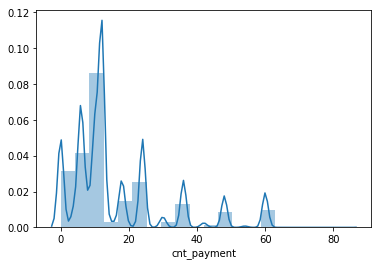

In [72]:
#cnt_payment -
print(description.description[202])
print(pa1_tr.cnt_payment.isnull().sum())
sns.distplot(pa1_tr.cnt_payment.dropna(), kde=True, bins=20)

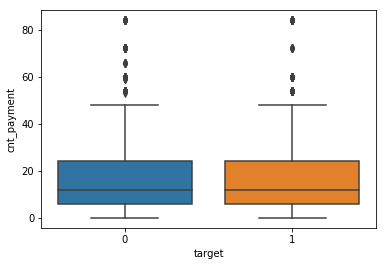

In [73]:
sns.boxplot(x='target', y='cnt_payment', data=pa1_tr)

In [64]:
#name_yield_group - taxa de juros em categorias
print(description.description[203])
print(pa1_tr.name_yield_group.isnull().sum())
pa1_tr.groupby('name_yield_group').target.describe()

Grouped interest rate into small medium and high of the previous application
0


count      mean       std  min  25%  50%  75%  max
name_yield_group                                                       
XNA               429198.0  0.098633  0.298169  0.0  0.0  0.0  0.0  1.0
high              306061.0  0.095452  0.293838  0.0  0.0  0.0  0.0  1.0
low_action         78587.0  0.064514  0.245669  0.0  0.0  0.0  0.0  1.0
low_normal        274884.0  0.071321  0.257361  0.0  0.0  0.0  0.0  1.0
middle            324971.0  0.080432  0.271961  0.0  0.0  0.0  0.0  1.0

In [65]:
#product_combination - combinacao de produtos
print(description.description[204])
print(pa1_tr.product_combination.isnull().sum())
pa1_tr.groupby('product_combination').target.describe()

Detailed product combination of the previous application
313


count      mean       std  min  25%  50%  \
product_combination                                                           
Card Street                      94594.0  0.112904  0.316477  0.0  0.0  0.0   
Card X-Sell                      66774.0  0.093045  0.290498  0.0  0.0  0.0   
Cash                            235101.0  0.095410  0.293781  0.0  0.0  0.0   
Cash Street: high                51699.0  0.113639  0.317375  0.0  0.0  0.0   
Cash Street: low                 28593.0  0.101004  0.301339  0.0  0.0  0.0   
Cash Street: middle              29934.0  0.116156  0.320417  0.0  0.0  0.0   
Cash X-Sell: high                50802.0  0.114936  0.318948  0.0  0.0  0.0   
Cash X-Sell: low                110599.0  0.065832  0.247990  0.0  0.0  0.0   
Cash X-Sell: middle             120036.0  0.078360  0.268738  0.0  0.0  0.0   
POS household with interest     226464.0  0.077346  0.267140  0.0  0.0  0.0   
POS household without interest   71519.0  0.066402  0.248985  0.0  0.0  0.0   
POS industry with interest       83508.0  0.063024  0.243007  0.0  0.0  0.0   
POS industry without interest    10621.0  0.046417  0.210397  0.0  0.0  0.0   
POS mobile with interest        190850.0  0.088106  0.283450  0.0  0.0  0.0   
POS mobile without interest      19890.0  0.078834  0.269486  0.0  0.0  0.0   
POS other with interest          20309.0  0.081343  0.273368  0.0  0.0  0.0   
POS others without interest       2095.0  0.072076  0.258676  0.0  0.0  0.0   

                                75%  max  
product_combination                       
Card Street                     0.0  1.0  
Card X-Sell                     0.0  1.0  
Cash                            0.0  1.0  
Cash Street: high               0.0  1.0  
Cash Street: low                0.0  1.0  
Cash Street: middle             0.0  1.0  
Cash X-Sell: high               0.0  1.0  
Cash X-Sell: low                0.0  1.0  
Cash X-Sell: middle             0.0  1.0  
POS household with interest     0.0  1.0  
POS household without interest  0.0  1.0  
POS industry with interest      0.0  1.0  
POS industry without interest   0.0  1.0  
POS mobile with interest        0.0  1.0  
POS mobile without interest     0.0  1.0  
POS other with interest         0.0  1.0  
POS others without interest     0.0  1.0

Relative to application date of current application when was the first disbursement of the previous application
561106


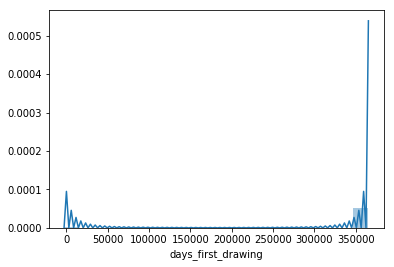

In [74]:
#days_first_drawing - ??
print(description.description[205])
print(pa1_tr.days_first_drawing.isnull().sum())
sns.distplot(pa1_tr.days_first_drawing.dropna(), kde=True, bins=20)

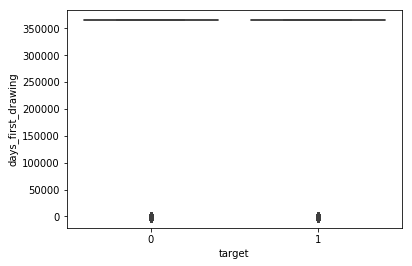

In [75]:
sns.boxplot(x='target', y='days_first_drawing', data=pa1_tr)

Relative to application date of current application when was the first due supposed to be of the previous application
561106


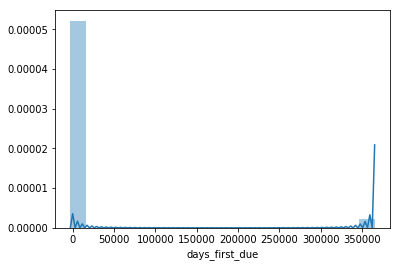

In [76]:
#days_first_due
print(description.description[206])
print(pa1_tr.days_first_due.isnull().sum())
sns.distplot(pa1_tr.days_first_due.dropna(), kde=True, bins=20)

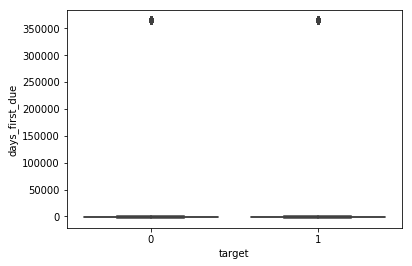

In [77]:
sns.boxplot(x='target', y='days_first_due', data=pa1_tr)

Relative to application date of current application when was the first due of the previous application
561106


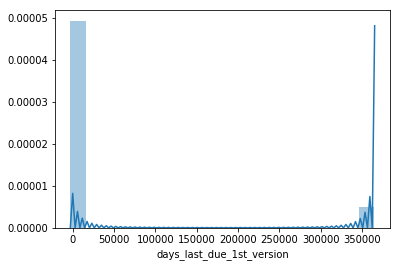

In [78]:
#days_last_due_1st_version
print(description.description[207])
print(pa1_tr.days_last_due_1st_version.isnull().sum())
sns.distplot(pa1_tr.days_last_due_1st_version.dropna(), kde=True, bins=20)

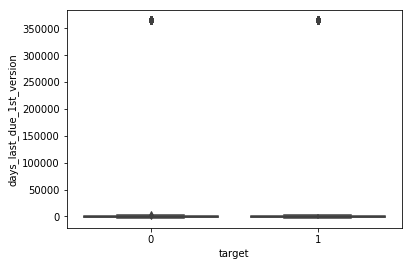

In [79]:
sns.boxplot(x='target', y='days_last_due_1st_version', data=pa1_tr)

Relative to application date of current application when was the last due date of the previous application
561106


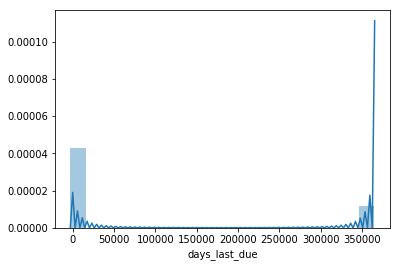

In [80]:
#days_last_due
print(description.description[208])
print(pa1_tr.days_last_due.isnull().sum())
sns.distplot(pa1_tr.days_last_due.dropna(), kde=True, bins=20)

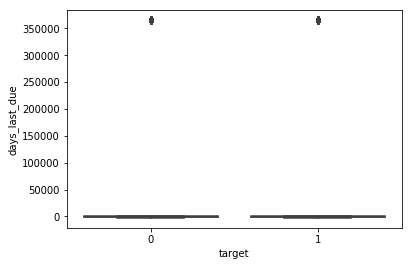

In [81]:
sns.boxplot(x='target', y='days_last_due', data=pa1_tr)

Relative to application date of current application when was the expected termination of the previous application
561106


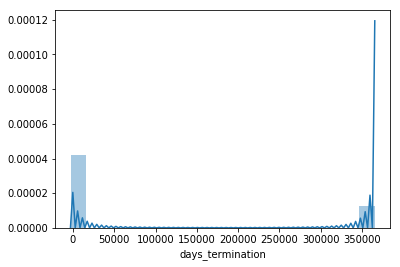

In [82]:
#days_termination
print(description.description[209])
print(pa1_tr.days_termination.isnull().sum())
sns.distplot(pa1_tr.days_termination.dropna(), kde=True, bins=20)

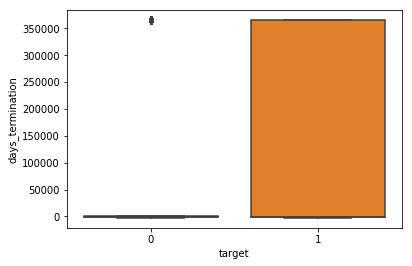

In [83]:
sns.boxplot(x='target', y='days_termination', data=pa1_tr)

In [84]:
#nflag_insured_on_approval
print(description.description[210])
print(pa1_tr.nflag_insured_on_approval.isnull().sum())
pa1_tr.groupby('nflag_insured_on_approval').target.describe()

Did the client requested insurance during the previous application
561106


count      mean       std  min  25%  50%  75%  \
nflag_insured_on_approval                                                     
0.0                        570751.0  0.075767  0.264625  0.0  0.0  0.0  0.0   
1.0                        281844.0  0.076134  0.265213  0.0  0.0  0.0  0.0   

                           max  
nflag_insured_on_approval       
0.0                        1.0  
1.0                        1.0

### Ideias novas features

In [ ]:
#nova feature: amt_credit - amt_application (diferenca do pedido e do emprestado)